# **Pneumonia - Chest X-Ray Image Classification**

We are given with chest X-Ray Images of Pneumonia and Normal Patients,

## Our Goal is to Build an Algorithm which Accurately Classifies the X-ray images(NORMAL VS PNEUMONIA)

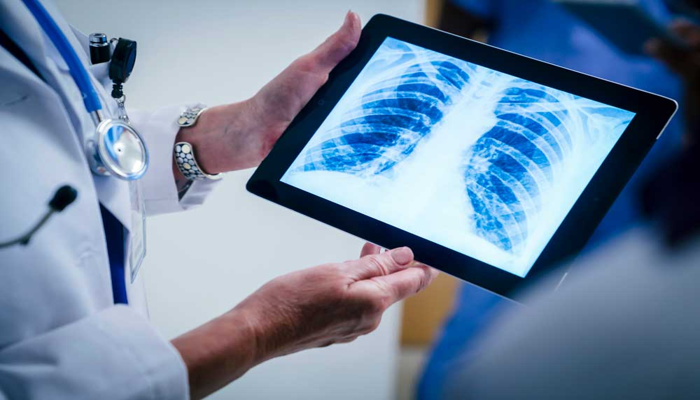

In [1]:
from PIL import Image
from IPython.display import display
image = Image.open('/kaggle/input/x-ray-holding-image/Doctor-holding-image-of-chest-xray.jpg')
new_image = image.resize((700, 400))
display(new_image)

In [2]:
# Importing Necessary Libraries 
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
from numpy.random import seed
seed(42)
import os
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import cv2


import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**DATA IMPORTING**

In [3]:
#main_path = "../input/chest-xray-pneumonia/chest_xray/"
main_path = "../input/chest-xray-pneumonia/chest_xray"

train_path = os.path.join(main_path,"train")
test_path = os.path.join(main_path,"test")
val_path = os.path.join(main_path,"val")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

val_normal = glob.glob(val_path +"/NORMAL/*.jpeg")
val_pneumonia = glob.glob(val_path +"/PNEUMONIA/*.jpeg")

**DATA ORGANIZATION AND PROFILING**

In [4]:
# Organizing/Forming Train set dataframe 
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])
df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]
df_train.head()

,class,image
0,Normal,../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0771-0001.jpeg
1,Normal,../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1294-0001-0002.jpeg
2,Normal,../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0675-0001.jpeg
3,Normal,../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1169-0001.jpeg
4,Normal,../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0421-0001.jpeg


In [5]:
# We have 5216 entities in our Training data 
len(df_train)

5216

In [6]:
# Organizing/Forming Test set dataframe 
test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]
df_test.head()

,class,image
0,Normal,../input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0336-0001.jpeg
1,Normal,../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0101-0001.jpeg
2,Normal,../input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0337-0001.jpeg
3,Normal,../input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0198-0001.jpeg
4,Normal,../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0013-0001.jpeg


In [7]:
# We have 624 entities in our Testing data 
len(df_test)

624

In [8]:
# Organizing/Forming Validation set dataframe 
val_list = [x for x in val_normal]
val_list.extend([x for x in val_pneumonia])

val_df = pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Pneumonia']*len(val_pneumonia)]), columns = ['class'])
val_df['image'] = [x for x in val_list]
val_df.head()

,class,image
0,Normal,../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg
1,Normal,../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg
2,Normal,../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg
3,Normal,../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
4,Normal,../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg


In [9]:
# We have 16 entities in our Validation data 
len(val_df)

16

**DATA VISUALIZATION**

Printing Three Random images of Normal Patients

Printing three Normal random images 
IM-0089-0001.jpeg
NORMAL2-IM-0173-0001-0002.jpeg
IM-0075-0001.jpeg


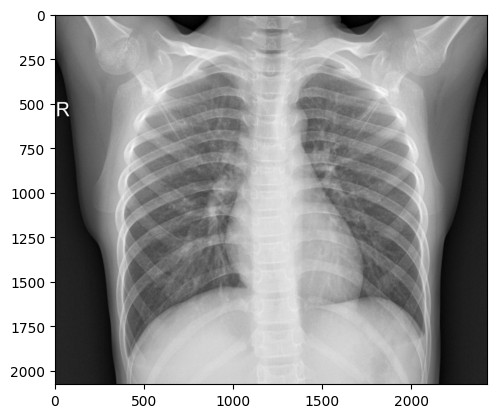

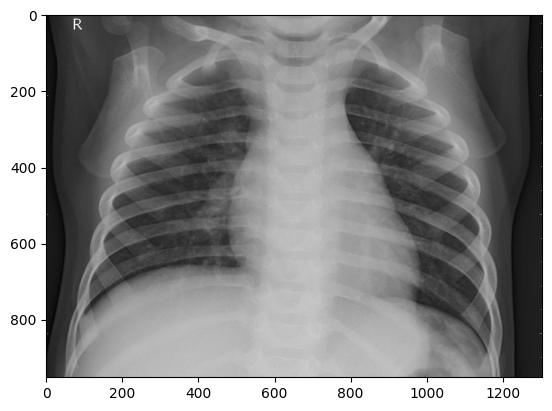

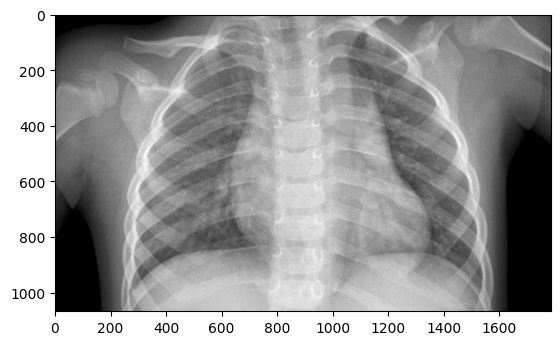

In [10]:
# Three Random Normal CXR Images from the dataset
import os, random

folder_N=r"../input/chest-xray-pneumonia/chest_xray/test/NORMAL"

a=random.choice(os.listdir(folder_N))
b=random.choice(os.listdir(folder_N))
c=random.choice(os.listdir(folder_N))
print("Printing three Normal random images ")
print(a)
print(b)
print(c)

random_N = [a, b, c]

for i in random_N:
    file = folder_N+'/'+i
    img = image.load_img(file)
    plt.figure()
    plt.imshow(img)
    plt.show() 

Printing Three Random images of Pneumonia Patient

Printing three Normal random images 
person1620_virus_2807.jpeg
person173_bacteria_831.jpeg
person1644_virus_2844.jpeg


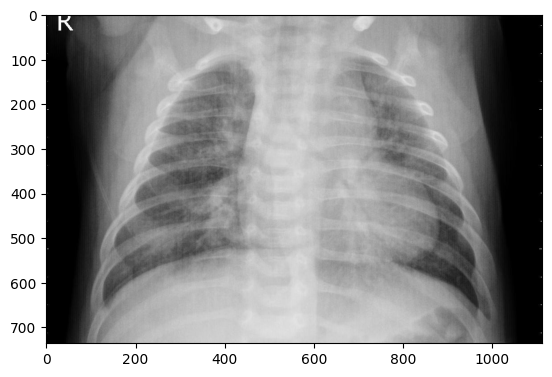

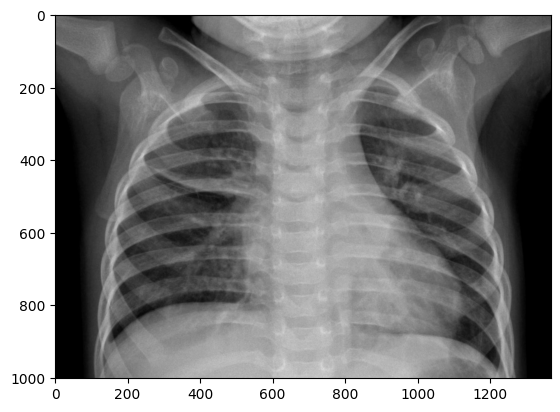

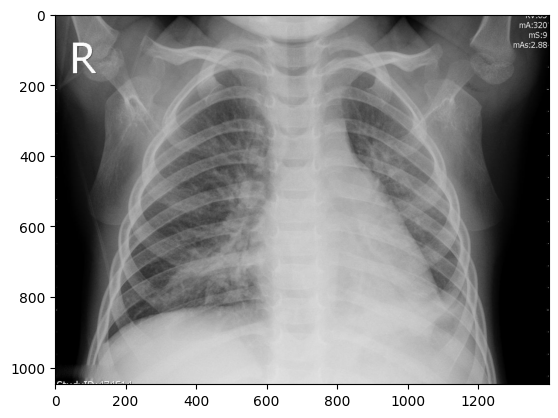

In [11]:
import os, random

folder_N=r"../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA"

a=random.choice(os.listdir(folder_N))
b=random.choice(os.listdir(folder_N))
c=random.choice(os.listdir(folder_N))
print("Printing three Normal random images ")
print(a)
print(b)
print(c)

random_N = [a, b, c]

for i in random_N:
    file = folder_N+'/'+i
    img = image.load_img(file)
    plt.figure()
    plt.imshow(img)
    plt.show() 

Printing three Normal random images 
NORMAL2-IM-0315-0001.jpeg
NORMAL2-IM-0246-0001-0002.jpeg
IM-0091-0001.jpeg


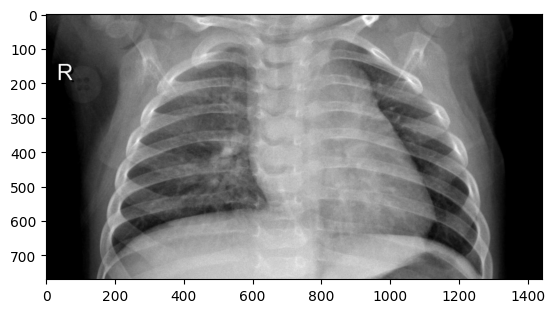

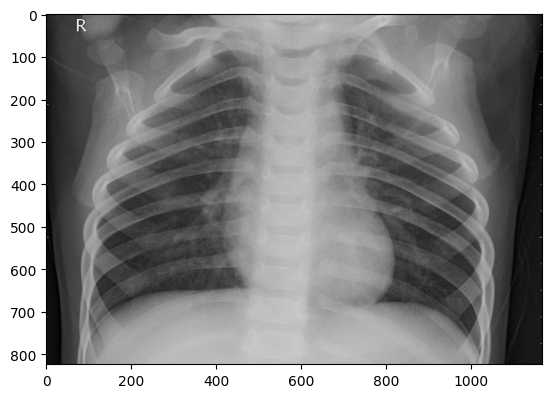

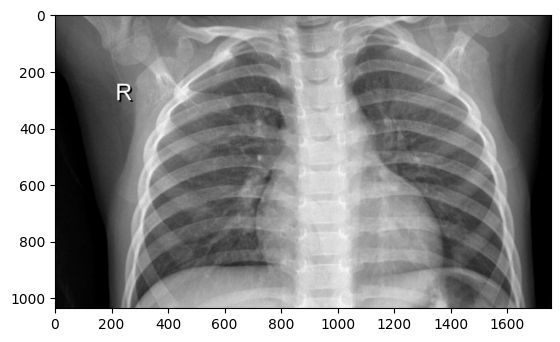

In [12]:

import os, random

folder_N=r"../input/chest-xray-pneumonia/chest_xray/test/NORMAL"

a=random.choice(os.listdir(folder_N))
b=random.choice(os.listdir(folder_N))
c=random.choice(os.listdir(folder_N))
print("Printing three Normal random images ")
print(a)
print(b)
print(c)

random_N = [a, b, c]

for i in random_N:
    file = folder_N+'/'+i
    img = image.load_img(file)
    plt.figure()
    plt.imshow(img)
    plt.show() 

**EXPLORING THE DATASET**

**TRAIN-SET**

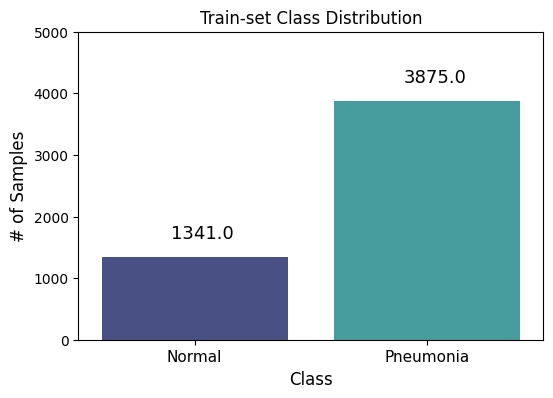

In [13]:
# Checking Train-set target Distribution 
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)
plt.title("Train-set Class Distribution")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

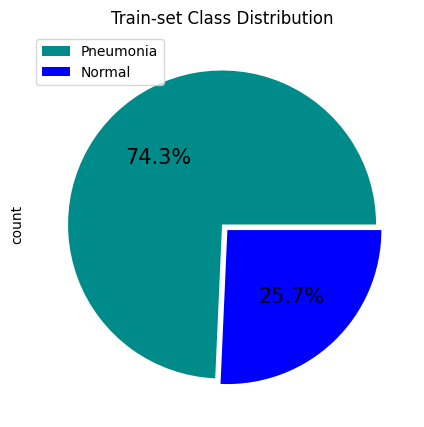

In [14]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.title("Train-set Class Distribution")
plt.show()

**TEST SET**

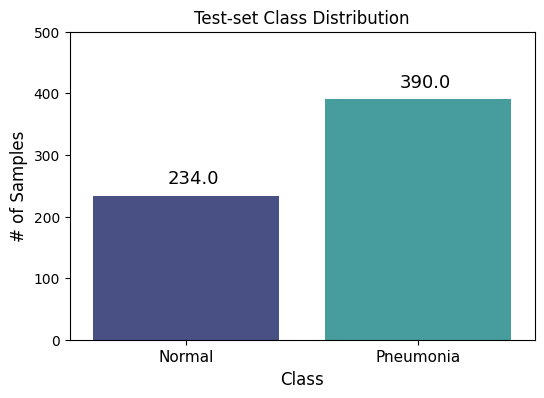

In [15]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)
plt.title("Test-set Class Distribution")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)
    
plt.show()

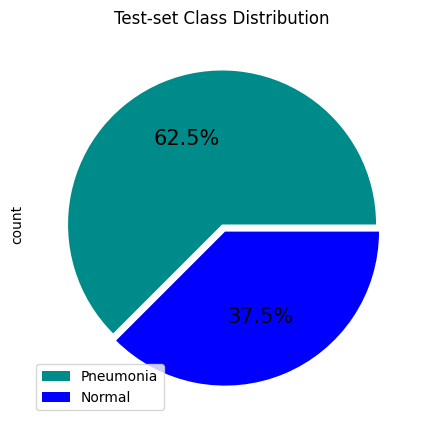

In [16]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.title("Test-set Class Distribution")
plt.show()

The Distribution of Target Class in both Training and Testing dataset is **Slightly Imbalanced** with more samples from positive class(i.e Pneumonia) 

**PREPARING THE DATASET FOR MODEL BUILDING**

Since Validation set is already given we don't need to create it separatly from training set by 80:20 ratio 

**Augmenting the Training Data** 
* To Increasing the Diversity of Traning Data - Applying Random Transformation 
(Like Flips, Shift, Zoom)
* To Reduce Overfitting
* To Improve Generalization 
* For Better Feature Learning


Here I am doing Two Things:- **Augementing the training data and Re-Scaling the Pixel (Normalization)**

I will Acheive this by Defining:
Two Data Generators using Keras Image Data generators Function 
(Data Generators are used  to load and pre-process data

**train_datagen** - It Rescale and Augementes the training dataset 

**val_datagen** - This is used for the validation and test sets. It mainly rescales the pixel values, meaning it adjusts the scale of pixel intensity values to a standard range.


In [17]:
# Defining Data-Generator for Training-Dataset (Re-scaling and applying Data Augementation)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalizationfor testing set.

# Defining Data-Generator for Validation set (Re-scaling pixel value to standard size)
val_datagen = ImageDataGenerator(rescale = 1./255)  

In [18]:
nb_train_sample =1000
nb_validation_samples =100
batch_size = 32 

Now I will use `flow_from_directory` method to integerate with data_generators, the method will produce batches of data as per specifications provided in the method and then applied transformation defined in the data_generators and Hence, pre-processed the dataset on fly just before loading it into the model 

In [19]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = val_datagen.flow_from_directory(val_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**MODEL BUILDING**

we are done with data-prepocessing, Our Data is ready for Model-Building 

In [80]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True, mode="min", verbose=1)

In [76]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [84]:
cnn_model = cnn.fit(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_set,
                         validation_steps = 624)

163/163 [==============================] - 47s 290ms/step - loss: 0.1396 - accuracy: 0.9461 - val_loss: 0.4869 - val_accuracy: 0.6875


**PERFORMANCE METRICS**

**Validation set Evaluation**

In [27]:
score = cnn.evaluate(validation), steps = 624, verbose = 0)

print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6133511066436768
Validation accuracy: 0.6875


Our Model is 68.75% Accurate in Predicting Pneumonia Images on the VALIDATION SET

**Test Set Evaluation**

In [85]:
score = cnn.evaluate(test_set, steps = 624, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3352278769016266
Test accuracy: 0.8846153616905212


Our Model is 88.4% Accurate in Predicting Pneumonia Images on TEST SET

20/20 [==============================] - 5s 229ms/step


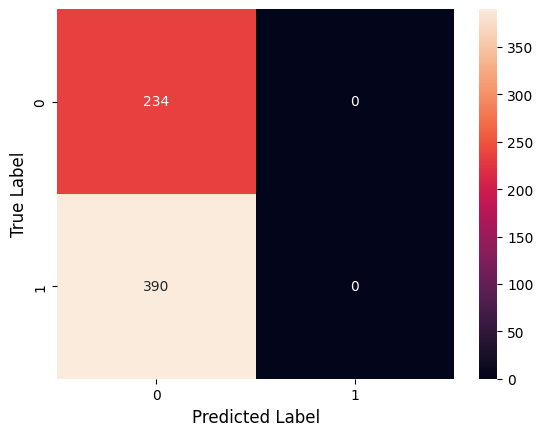

In [86]:
test_set.reset()  # Reset generator to the beginning

# Step 1: Generate Predictions
predictions = cnn.predict_generator(test_set, steps=len(test_set), verbose=1)

# Step 2: Convert Predictions to Class Labels (Binary Classification)
predicted_labels = np.argmax(predictions, axis=1)

# Step 3: Get True Labels from the Generator
true_labels = test_set.classes

# Step 4: Build Confusion Matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

sns.heatmap(confusion_mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [88]:
from sklearn import metrics
print(metrics.classification_report(true_labels, predicted_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55       234
           1       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



ROC_AUC:  0.5


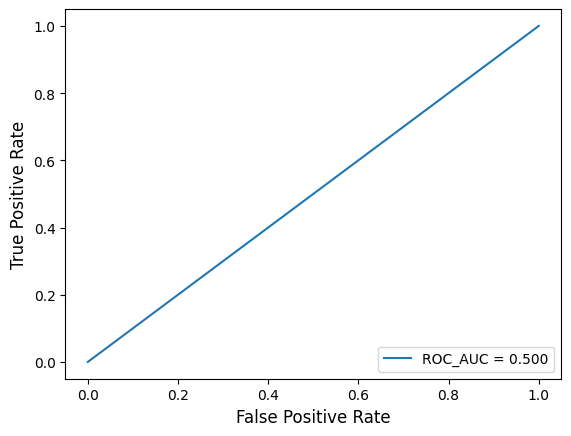

In [96]:
roc_auc = metrics.roc_auc_score(true_labels, predicted_labels)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(true_labels, predicted_labels)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

**CONCLUSION/RESULT**

Our Model is 50% Accurate in distinguishes the Positve Class, Which is same as by Random Chance 

Without any Medical expertise anyone can understand that in this scenerio Recall is the most IMP Metrics Here.Because Recall concludes that How is our model is good in predicting the Positive class in this case it is Pneumonia 

We are getting 50% Recall on our test Set, Means that our Model is correctly identifying half of the Pneumonia cases (true positives), while the other half of the positive cases is being classified as negatives (false negatives). Suppose we have 120 Pneumonia cases on our test set then out model will correctly Identify 60 of them 

----------------------------------------------------------------------------------------------------------------------------

# THANK YOU

In [1]:
from IPython.display import Image
Image(url='https://gifdb.com/images/high/namaste-bryan-giles-red-fang-band-bowing-0svrh1qoy7d0bcwz.gif')  